# Titanic Surviver's Data

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import chart_studio.tools as tls
import plotly.graph_objs as go
from chart_studio.plotly import iplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("C:/Users/vinam/Downloads/titanic2.0/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


*We have passenger data of 890 people with 12 columns* 

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age and Cabin column have missing values. With major number of values missing in column Cabin. We might drop the column Cabin

We will deal with the null values later. Let's do Explorartory Data Analysis

# EDA

### What is the count of number of people survived and not survived?

<AxesSubplot:xlabel='Survived', ylabel='count'>

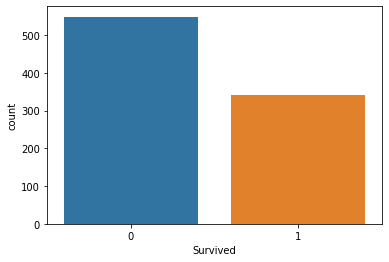

In [25]:
sns.countplot(x=df["Survived"])

### What is the count of number of males and females survived?

<AxesSubplot:xlabel='Survived', ylabel='count'>

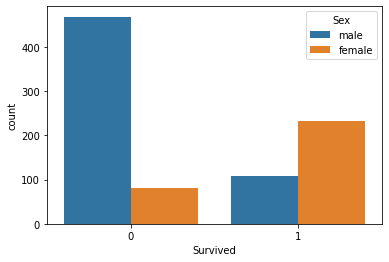

In [26]:
sns.countplot(x="Survived",hue="Sex",data=df)

##### Most of the males did not survived. Many females and few males survived.

### What is the count of Sex in the ship?

<AxesSubplot:xlabel='Sex', ylabel='count'>

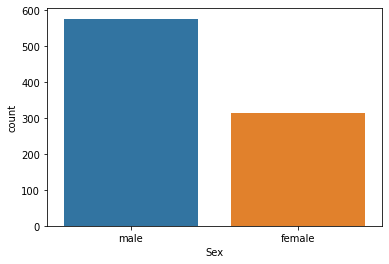

In [38]:
sns.countplot(x=df["Sex"])

### What is count of Age with respect to males and females in the ship?

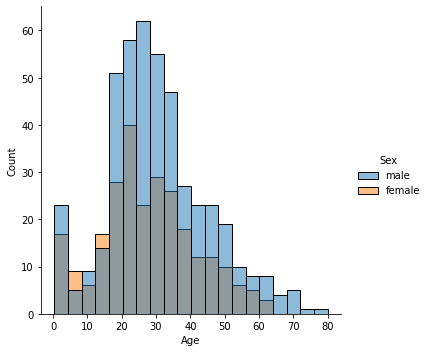

In [37]:
sns.displot(x=df["Age"],hue=df["Sex"])

### What is the count of males and females with respect to the passenger class?

<AxesSubplot:xlabel='Sex', ylabel='count'>

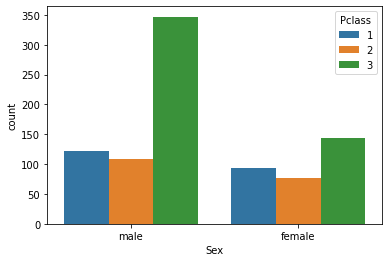

In [39]:
sns.countplot(x=df["Sex"],hue=df["Pclass"])

##### Most males and femals are from 3 class

### From where did people of different class embarked the ship?

<AxesSubplot:xlabel='Pclass', ylabel='count'>

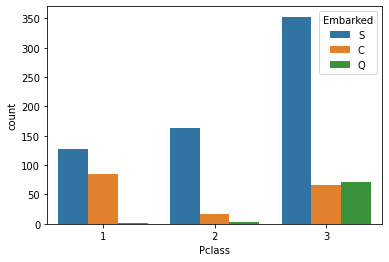

In [4]:
sns.countplot(x=df["Pclass"],hue=df["Embarked"])

#### Most 3 pclass embarked the ship from Southampton and most 1 pclass passenger embarked from southampton and cherbourg.

### What is trend of people survived based on their Age?

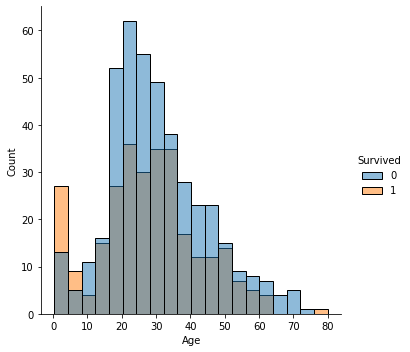

In [29]:
sns.displot(x=df["Age"],hue=df["Survived"])

#### Most young people survived and older people survived else not many people survived

### What amount of fare did every passenger class paid?

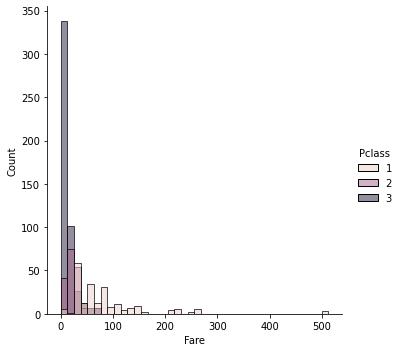

In [35]:
sns.displot(x=df["Fare"],bins=40,hue=df["Pclass"])

#### Most 3 pclass passenger our free and many 1 pclass member paid money.

### What is the trend of number of husbands and children with respect to Passenger Class?

<AxesSubplot:xlabel='Parch', ylabel='count'>

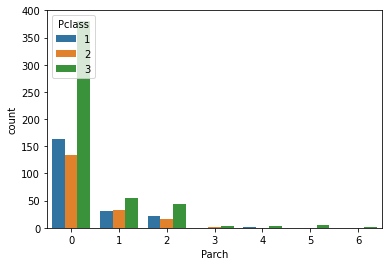

In [37]:
sns.countplot(x=df["Parch"],hue=df["Pclass"])

#### Most 3 pclass passenger travelled alone

<AxesSubplot:xlabel='SibSp', ylabel='count'>

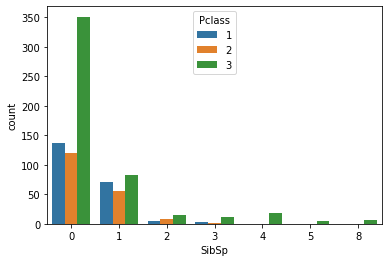

In [39]:
sns.countplot(x=df["SibSp"],hue=df["Pclass"])

##### What is the trend of people embarking the ship with respect to ship?

<AxesSubplot:xlabel='Embarked', ylabel='count'>

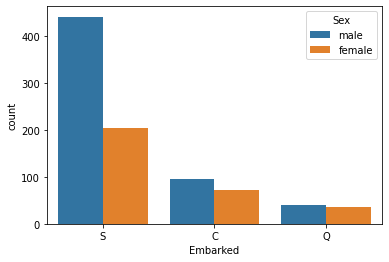

In [55]:
sns.countplot(x=df["Embarked"],hue=df["Sex"])

#### Most males embarked from Southampton and then the trends slows down with few people embarking from Chewberg and very few people from Queenstown.

# Filling the missing values

In [4]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [5]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [6]:
df.drop(columns="Cabin",axis=1,inplace=True)

#### We have filled the missing age values with the mean of different pclass passengers and most of the values were missing in cabin columns so we dropped it.

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
copy_df=df.copy()

# Dealing with Categorical Data

#### We have Sex and Embarked as catergorical data. To keep this project brief we will be discarding Name and ticket columns 

##### We will use one hot encoding to deal with categorical data

In [8]:
one_hot_sex=pd.get_dummies(df["Sex"],drop_first=True)
one_hot_embark=pd.get_dummies(df["Embarked"],drop_first=True)


In [9]:
df.drop(["Sex","Embarked","Name","Ticket"],inplace=True,axis=1)

In [10]:
final_df=pd.concat([df,one_hot_sex,one_hot_embark],axis=1)

In [11]:
final_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


##### Passenger id is just a count of total passengers. We don't need it so we are going to discard it.

In [12]:
final_df.drop(columns=["PassengerId"],axis=1,inplace=True)


In [13]:
final_df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

##### Survived column is our target variable and all other columns are our features.

<AxesSubplot:>

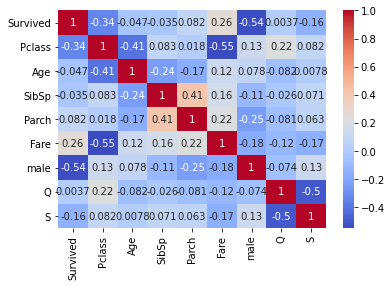

In [27]:
corr=final_df.corr()
plt.figsize=(20,8)
sns.heatmap(corr,annot=True,cmap="coolwarm")

#### The correlation of features with respect to our target variable (Survived).

# Building Logistic Regression Model

In [14]:
X=final_df[[ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
Y=final_df["Survived"]


In [15]:
log_reg=LogisticRegression(max_iter=1000)

### Splitting the dataset into train and test

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=44)

### Training and Predicting data

In [17]:
model=log_reg.fit(X_train,Y_train)

In [18]:
predicts=model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [20]:
score=accuracy_score(Y_test,predicts)

In [21]:
print(score)

0.7597765363128491


In [22]:
print(classification_report(Y_test,predicts))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       106
           1       0.71      0.70      0.70        73

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



In [36]:
print(confusion_matrix(Y_test,predicts))

[[85 21]
 [22 51]]


##### Our model has the accuracy of 75% and with a F1 score 76%  with number of false postives as 21 and false negative as 22